In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
data80 = pd.read_csv('105v2.csv', parse_dates=True, index_col='DateTime',encoding="windows-1252") # или 105
data80.head(5)

,AffinityIndex,SerialNumber,H,Tmean,WmeanH,WindDirectionH(Â°),WminH,WmaxH,WmeanV,AtmosphericPressure,RelativeHumidity,TdewPoint(Â°C),WaterVaporElasticity,AbsolutusHumidity,DensityofAir,SpeedofSoundinAir
DateTime,,,,,,,,,,,,,,,,
2017-07-22 00:01:00,6,12427AMK-03,15,15.86,0.20,94.53,0.01,0.44,-0.13,750.45,100.0,15.86,17.99,14.53,1.1954,342.12
2017-07-22 00:02:00,6,12427AMK-03,15,15.88,0.28,104.28,0.15,0.53,-0.19,750.45,100.0,15.88,18.01,14.55,1.1953,342.14
2017-07-22 00:03:00,6,12427AMK-03,15,15.87,0.23,68.53,0.11,0.36,-0.19,750.45,100.0,15.87,17.99,14.54,1.1954,342.13
2017-07-22 00:04:00,6,12427AMK-03,15,15.95,0.17,47.04,0.01,0.33,-0.18,750.45,100.0,15.95,18.09,14.62,1.1950,342.18
2017-07-22 00:05:00,6,12427AMK-03,15,16.01,0.06,11.99,0.01,0.22,-0.19,750.45,100.0,16.01,18.16,14.68,1.1947,342.22


In [3]:
data80 = data80.groupby('DateTime')['Tmean'].sum().reset_index()

In [4]:
data80 = data80.set_index('DateTime')
data80.index

DatetimeIndex(['2017-07-22 00:01:00', '2017-07-22 00:02:00',
               '2017-07-22 00:03:00', '2017-07-22 00:04:00',
               '2017-07-22 00:05:00', '2017-07-22 00:06:00',
               '2017-07-22 00:07:00', '2017-07-22 00:08:00',
               '2017-07-22 00:09:00', '2017-07-22 00:10:00',
               ...
               '2020-04-09 23:50:00', '2020-04-09 23:51:00',
               '2020-04-09 23:52:00', '2020-04-09 23:53:00',
               '2020-04-09 23:54:00', '2020-04-09 23:55:00',
               '2020-04-09 23:56:00', '2020-04-09 23:57:00',
               '2020-04-09 23:58:00', '2020-04-09 23:59:00'],
              dtype='datetime64[ns]', name='DateTime', length=1183038, freq=None)

In [5]:
y = data80['Tmean'].resample('MS').mean() # MS - месяц, D - день


In [6]:
y.interpolate(method='linear', inplace=True)


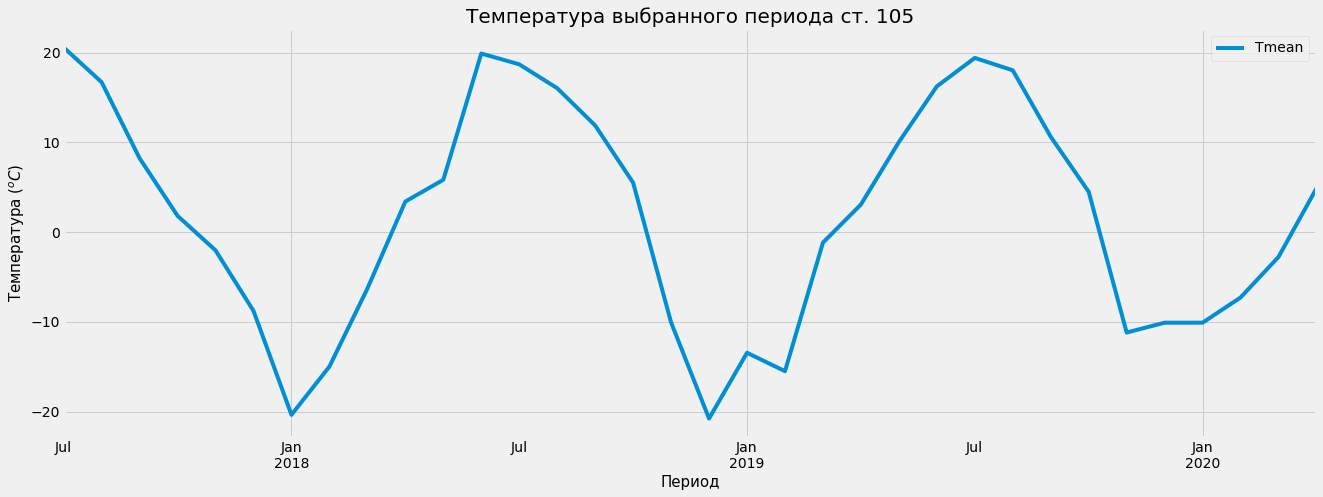

In [7]:
# Период с частотой №2-----------------------------------------------------------------------\
plt.figure()
y.plot(figsize=[20,7])
#per_temp2.plot(style='k.')
plt.title('Температура выбранного периода ст. 105', fontsize=20)
plt.grid(True)
plt.ylabel('Температура ($^oC$)',fontsize=15)
plt.xlabel('Период',fontsize=15)
plt.legend()

In [8]:
# y.plot(figsize=(15, 6))
# plt.show()

In [9]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [10]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:260.72959785072857
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:160.43168534979046
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:130.11080558622996
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:55.50284007463304
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:134.9719090104639
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:130.09558297980624
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:60.17182422023405
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:57.50289183885912
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:230.8798745872176
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:144.90940618091037
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:126.968606858854
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:51.6124419433836
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:136.94133191382767
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:126.84308089082447
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:61.07398150140802
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:53.60494407789349
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:224.16620404992756
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:137.74365450017604
ARI

In [11]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8039      0.411     -1.956      0.050      -1.609       0.002
ma.S.L12      -0.4310      0.464     -0.928      0.353      -1.341       0.479
sigma2        19.0075     22.973      0.827      0.408     -26.019      64.034


In [12]:
# results.plot_diagnostics(figsize=(15, 12))
# plt.show()

In [13]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()

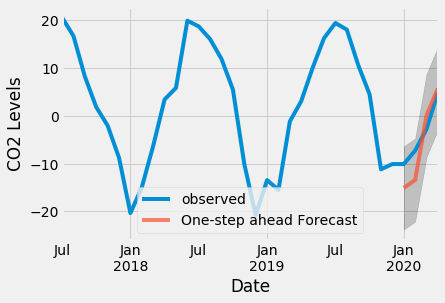

In [14]:
ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [15]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 17.86


In [16]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

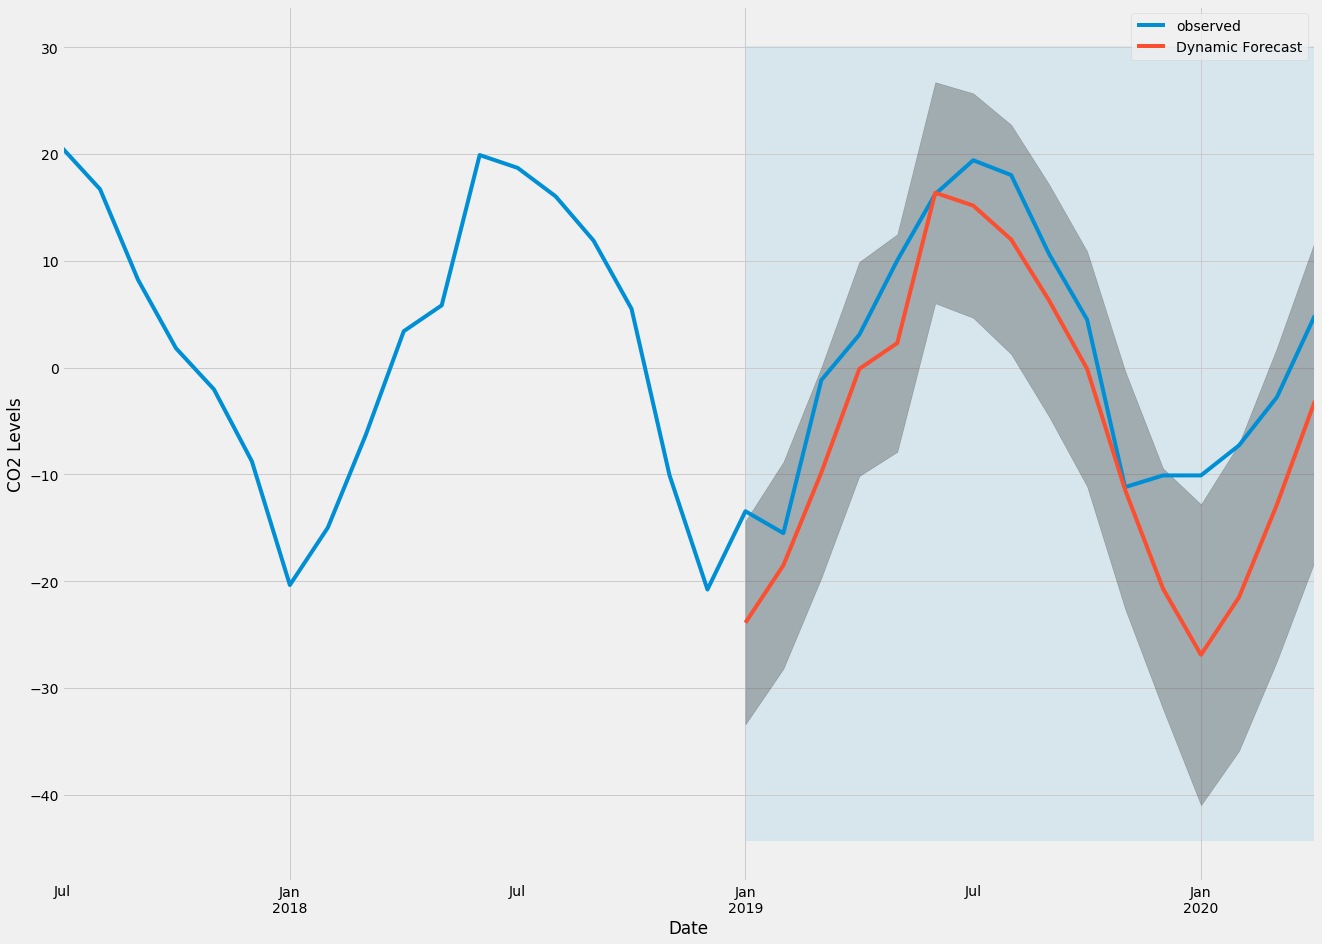

In [17]:
ax = y['2017':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [18]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2018-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 70.01


In [19]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

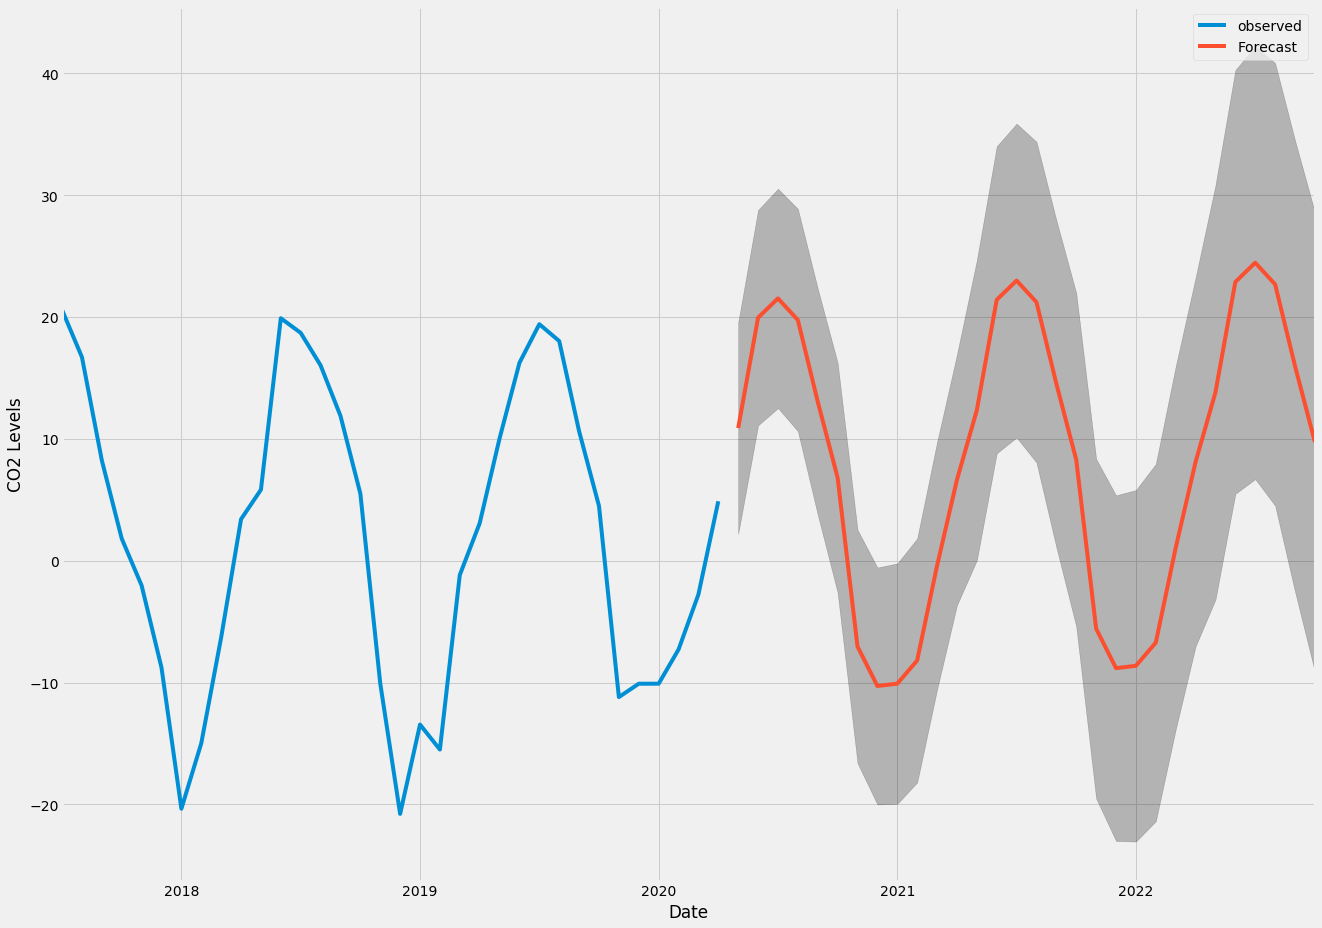

In [20]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()